<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [19]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [20]:
# Vemos cuales columnas son numericas y cuales son categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [21]:
# Conjunto de datos con variables numericas
df_num = df[["year", "desplazamiento", "cilindros", "co2", "consumo_litros_milla"]]
# Para datos vacios, rellenamos con el promedio asociado a cada columna
df_num = df_num.fillna(df_num.mean())
# Normalizamos los datos
scaler = MinMaxScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [22]:
# Conjunto de datos con variables categoricas
df_cat = df[["clase_tipo", "traccion_tipo", "transmision_tipo", "combustible_tipo", "tamano_motor_tipo", "consumo_tipo", "co2_tipo"]]
df_cat = pd.get_dummies(df_cat, dtype=int)
df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


A grandes rasgos, la codificación de variables categóricas a numéricas se realiza mediante columnas indicatrices. Para cada grupo categórico, se crea una columna y, para cada dato (fila del DataFrame), el valor en dicha columna es 1 si el dato pertenece al grupo categórico y 0 si no.

In [23]:
# Juntamos los dos dataframes en uno
df_procesado = pd.concat([df_num, df_cat], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cada cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [24]:
# 1. Ajuste del modelo sobre df_procesado
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10) # 8 clusters
kmeans.fit(df_procesado)

KMeans(n_init=10, random_state=42)

In [25]:
# 2. Asociar cada individuo al cluster
df_procesado["cluster"] = kmeans.labels_
df_procesado["cluster"] = df_procesado["cluster"].astype('category')

df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3


In [26]:
# Calcular los centroides
centroids = kmeans.cluster_centers_ # centros
feature_cols = df_procesado.drop(columns="cluster").columns
centroids_df = pd.DataFrame(centroids, columns=feature_cols, index=[f"c{i}" for i in range(kmeans.n_clusters)])

centroids_df.head(8)

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
c0,0.427318,0.223790,0.173637,0.304599,0.226412,0.126441,0.097434,0.004835,0.088137,0.517665,...,1.831868e-15,9.776869e-01,9.048318e-15,9.076073e-15,2.231313e-02,4.635181e-15,9.921904e-01,7.809595e-03,4.246603e-15,-1.201816e-14
c1,0.569367,0.169607,0.146057,0.240820,0.156357,0.007990,0.117281,0.017606,0.138407,0.629063,...,-1.232348e-14,-1.679212e-14,1.354280e-04,-1.024181e-14,9.998646e-01,-9.103829e-15,1.218852e-03,8.125677e-04,8.160139e-15,9.979686e-01
c2,0.407666,0.331397,0.256796,0.354288,0.282121,0.181278,0.084035,0.090474,0.133564,0.184580,...,-7.271961e-15,1.386825e-02,9.808486e-01,7.355228e-15,5.283143e-03,1.155688e-03,-1.712519e-14,9.988443e-01,-6.022960e-15,-1.582068e-15
c3,0.476969,0.450984,0.327266,0.410019,0.343261,0.304450,0.017116,0.041506,0.048567,0.151048,...,9.584938e-01,-1.421085e-14,4.065041e-02,8.557980e-04,-6.578071e-15,9.957210e-01,7.494005e-16,6.418485e-04,3.637142e-03,-1.768030e-14
c4,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,-1.321165e-14,1.168452e-02,9.571568e-01,-6.494805e-15,1.703992e-03,7.494005e-16,4.868549e-04,9.978092e-01,-1.662559e-14
c5,0.588730,0.362290,0.299545,0.354136,0.282247,0.001505,0.083020,0.086531,0.189616,0.558816,...,5.016303e-04,2.608478e-02,9.731628e-01,1.360023e-14,2.508151e-04,2.357662e-02,7.771561e-16,9.764234e-01,-1.040834e-14,-1.634803e-14
c6,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,-1.032507e-14,5.599473e-03,9.367589e-01,-6.300516e-15,6.883383e-15,7.216450e-16,-9.436896e-15,1.000000e+00,-1.357248e-14
c7,0.579550,0.269830,0.210005,0.305067,0.226473,0.025947,0.094316,0.072488,0.192545,0.397446,...,6.177924e-04,9.619028e-01,8.237232e-04,1.523781e-14,3.665568e-02,2.969847e-15,9.684926e-01,2.944811e-02,-1.587619e-14,2.059308e-03


In [27]:
# 3. Resumen para cada cluster
num_cols = ["year", "desplazamiento", "cilindros", "co2", "consumo_litros_milla"]
df_cluster = df_procesado.groupby("cluster")[num_cols].mean()
df_cluster2 = df_procesado.groupby("cluster")[num_cols].apply(lambda x: x.mode().iloc[0])
print("Valor promedio de las variables numéricas:")
print(df_cluster)
print("\nModa para las variables numéricas:")
print(df_cluster2)

Valor promedio de las variables numéricas:
             year  desplazamiento  cilindros       co2  consumo_litros_milla
cluster                                                                     
0        0.427318        0.223790   0.173637  0.304599              0.226412
1        0.569367        0.169607   0.146057  0.240820              0.156357
2        0.407666        0.331397   0.256796  0.354288              0.282121
3        0.476969        0.450984   0.327266  0.410019              0.343261
4        0.384236        0.585590   0.430797  0.510289              0.454503
5        0.588730        0.362290   0.299545  0.354136              0.282247
6        0.452443        0.562730   0.405562  0.501887              0.442585
7        0.579550        0.269830   0.210005  0.305067              0.226473

Moda para las variables numéricas:
0            year  desplazamiento  cilindros       co2  consumo_litros_milla
cluster                                                                   

/tmp/ipython-input-2918601753.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster = df_procesado.groupby("cluster")[num_cols].mean()
/tmp/ipython-input-2918601753.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster2 = df_procesado.groupby("cluster")[num_cols].apply(lambda x: x.mode().iloc[0])


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [28]:
# implementación de la regla del codo
Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
df = df_procesado.drop(columns="cluster")
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]  # Suppressing the warning here
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': Nc, 'Score': score})

df_Elbow.head()

,Number of Clusters,Score
0,5,102310.085717
1,10,83396.136476
2,20,66869.823680
3,30,56226.812190
4,50,43969.546709


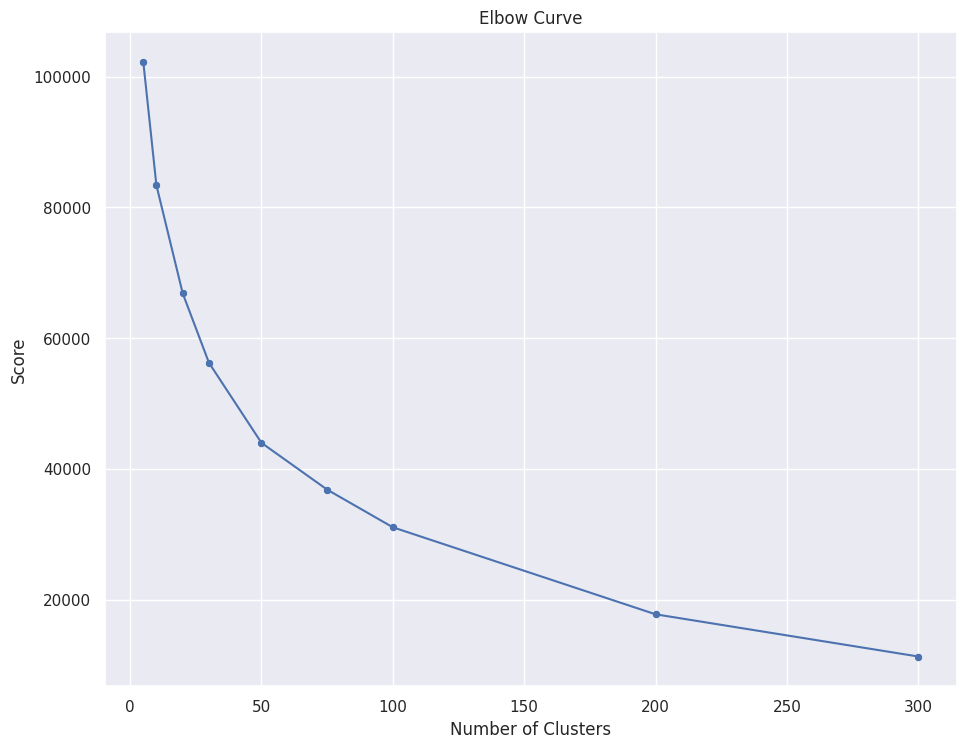

In [29]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

La curva no muestra un codo nítido, es decir, la inercia cae de forma continua. De todas formas, la curva parece aplanarse a partir de k=75.

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset *Wine*.



In [30]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [31]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



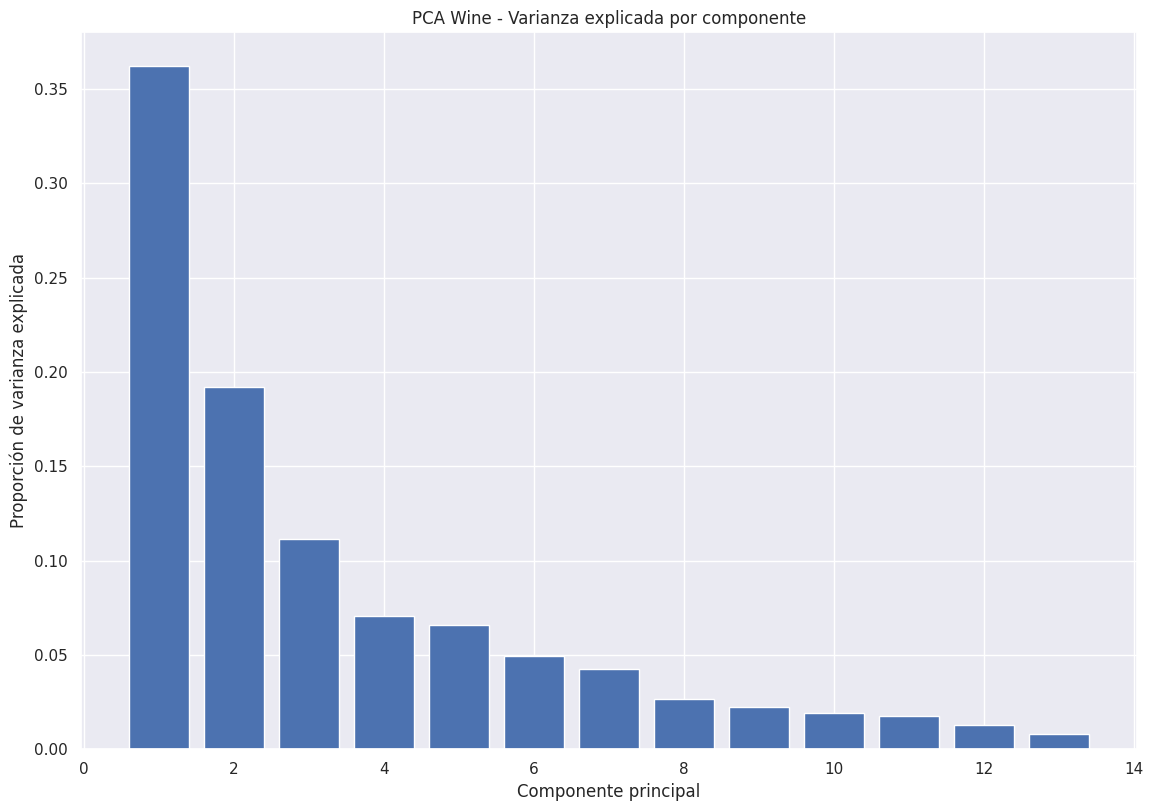

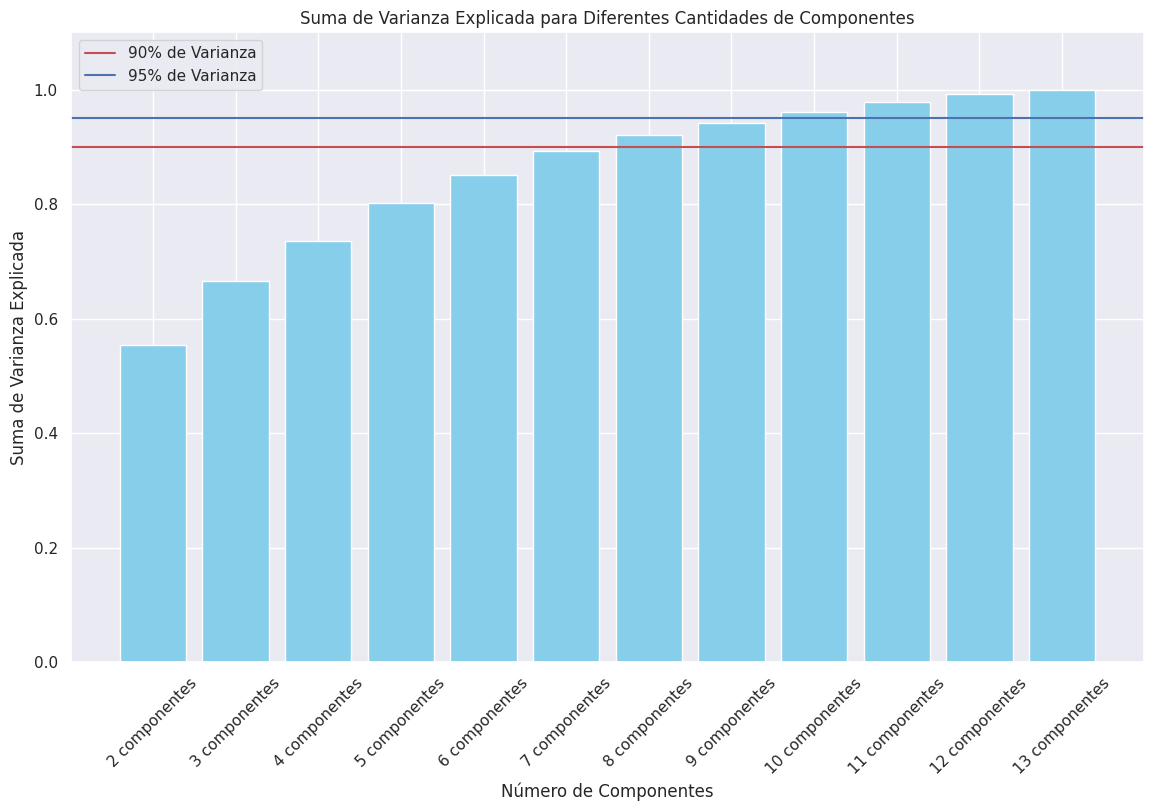

In [32]:
# 1. Analisis detallado con PCA
features = wine.drop(columns=target).columns.tolist()
target = "wine_class"

# Estandarizar los datos
X = wine[features].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Crear el modelo PCA y ajustar a los datos con todos los componentes
pca = PCA()
pca.fit(X_std)
explained = pca.explained_variance_ratio_


# Varianza explicada por componente
plt.figure()
plt.bar(range(1, len(explained) + 1), explained)
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA Wine - Varianza explicada por componente")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Calcular la suma de varianza explicada para diferentes cantidades de componentes
suma_varianza_explicada = {}
for n in range(2, 14):
    pca = PCA(n_components=n)
    pca.fit(X_std)
    suma_varianza = sum(pca.explained_variance_ratio_)
    suma_varianza_explicada[f'{n} componentes'] = suma_varianza

# Convertir los resultados a un DataFrame para graficar
df_varianza = pd.DataFrame(list(suma_varianza_explicada.items()), columns=['Componentes', 'Suma de Varianza Explicada'])

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(11.7,8.27))
plt.bar(df_varianza['Componentes'], df_varianza['Suma de Varianza Explicada'], color='skyblue')
plt.title("Suma de Varianza Explicada para Diferentes Cantidades de Componentes")
plt.xlabel("Número de Componentes")
plt.xticks(rotation=45)
plt.ylabel("Suma de Varianza Explicada")
plt.ylim(0, 1.1)
plt.tight_layout()
# Agregar la línea horizontal en 0.9
ax.axhline(y=0.9, color='r', linestyle='-', label='90% de Varianza')
# Agregar la línea horizontal en 0.95
ax.axhline(y=0.95, color='b', linestyle='-', label='95% de Varianza')
ax.legend()

plt.show()

Para capturar al menos el 90% de la información, se necesitan 8 componentes; para captar al menos el 95%, se necesitan 10 componentes.

**Suposición**: A continuación, usaremos 3 componentes para proyectar.

In [33]:
# Vemos como las observaciones (vinos) se proyectan en las primeras componentes principales
pca = PCA(n_components=3)
scores = pca.fit_transform(X_std)  # proyecciones (scores)
cols = [f"PC{i}" for i in range(1, scores.shape[1] + 1)]
scores_df = pd.DataFrame(scores, columns=cols)
scores_df["wine_class"] = wine[target].values

# Proyección de las observaciones en las primeras 3 componentes principales
scores_df.head(10)

,PC1,PC2,PC3,wine_class
0,3.316751,1.443463,-0.165739,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008908,0.869831,2.026688,0
5,3.050254,2.122401,-0.629396,0
6,2.449090,1.174850,-0.977095,0
7,2.059437,1.608963,0.146282,0
8,2.510874,0.918071,-1.770969,0
9,2.753628,0.789438,-0.984247,0


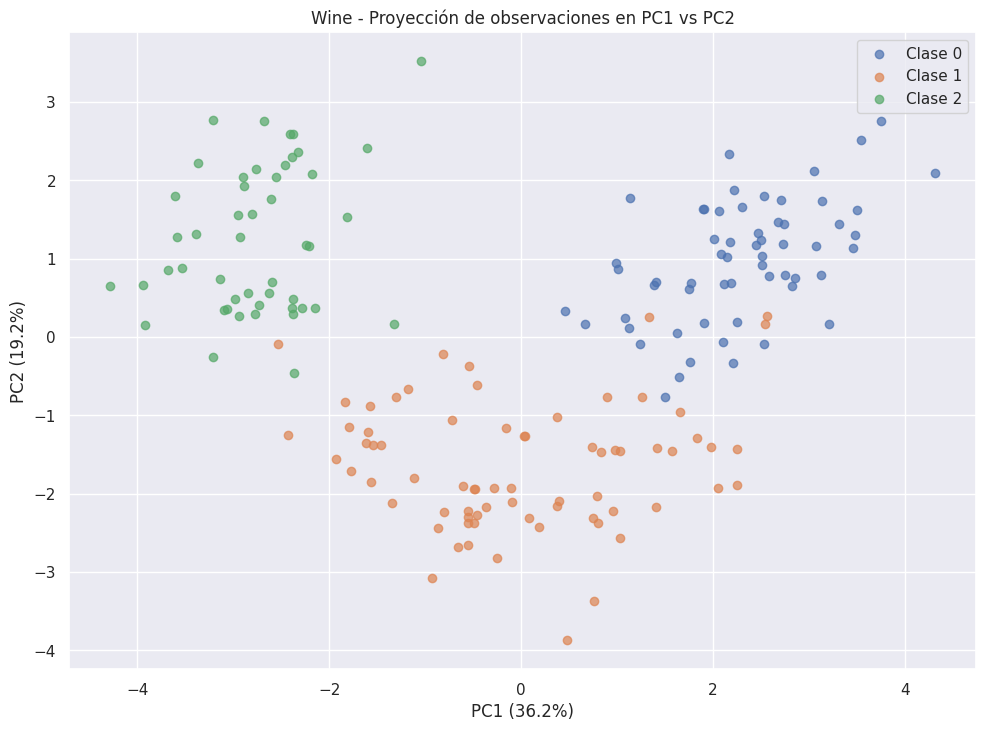

In [34]:
# Gráfico PC1 vs PC2
plt.figure()
for c in sorted(scores_df["wine_class"].unique()):
    sub = scores_df[scores_df["wine_class"] == c]
    plt.scatter(sub["PC1"], sub["PC2"], label=f"Clase {c}", alpha=0.7)
evr = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({evr[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({evr[1]*100:.1f}%)")
plt.title("Wine - Proyección de observaciones en PC1 vs PC2")
plt.legend()
plt.grid(True)
plt.show()

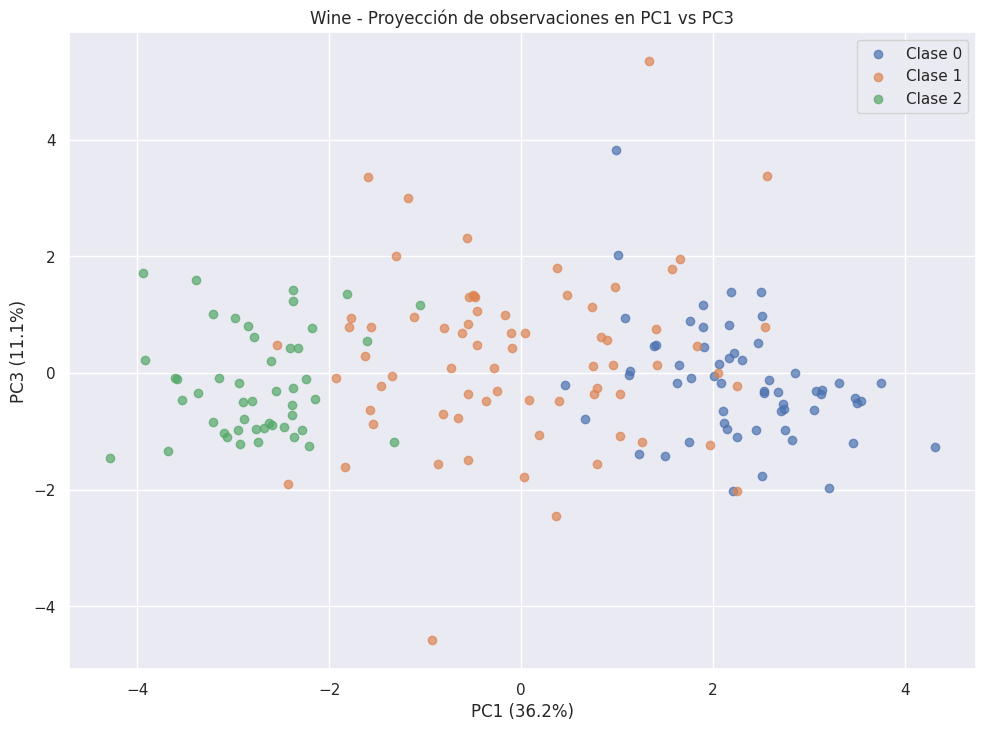

In [35]:
# Gráfico PC1 vs PC3
plt.figure()
for c in sorted(scores_df["wine_class"].unique()):
    sub = scores_df[scores_df["wine_class"] == c]
    plt.scatter(sub["PC1"], sub["PC3"], label=f"Clase {c}", alpha=0.7)
plt.xlabel(f"PC1 ({evr[0]*100:.1f}%)")
plt.ylabel(f"PC3 ({evr[2]*100:.1f}%)")
plt.title("Wine - Proyección de observaciones en PC1 vs PC3")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Analizamos los loadings
# Matriz de loadings: correlacion aprox. entre variables y PCs
#    Para datos estandarizados: loadings = eigenvectors * sqrt(eigenvalues)
#    En sklearn: components_.T son los eigenvectors; explained_variance_ son los eigenvalues.
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, index=features, columns=[f"PC{i}" for i in range(1, 4)])
loadings_df

,PC1,PC2,PC3
alcohol,0.313977,0.766413,-0.250087
malic_acid,-0.533385,0.356434,0.107342
ash,-0.004462,0.500855,0.755176
alcalinity_of_ash,-0.520622,-0.016782,0.738120
magnesium,0.308892,0.474812,0.157682
total_phenols,0.858552,0.103064,0.176280
flavanoids,0.920058,-0.005324,0.181710
nonflavanoid_phenols,-0.649434,0.045605,0.205450
proanthocyanins,0.681840,0.062279,0.180230
color_intensity,-0.192778,0.839852,-0.165580


In [37]:
# Top por PC (según magnitud absoluta)
top_pc1 = loadings_df["PC1"].abs().sort_values(ascending=False).head(5)
top_pc2 = loadings_df["PC2"].abs().sort_values(ascending=False).head(5)
top_pc3 = loadings_df["PC3"].abs().sort_values(ascending=False).head(5)

tops_table = pd.DataFrame({
    "Top5 |PC1|": top_pc1.index,
    "|PC1|": top_pc1.values.round(4),
    "Top5 |PC2|": top_pc2.index,
    "|PC2|": top_pc2.values.round(4),
    "Top5 |PC3|": top_pc3.index,
    "|PC3|": top_pc3.values.round(4)
})
tops_table.head()

,Top5 |PC1|,|PC1|,Top5 |PC2|,|PC2|,Top5 |PC3|,|PC3|
0,flavanoids,0.9201,color_intensity,0.8399,ash,0.7552
1,total_phenols,0.8586,alcohol,0.7664,alcalinity_of_ash,0.7381
2,od280/od315_of_diluted_wines,0.8183,proline,0.5782,alcohol,0.2501
3,proanthocyanins,0.6818,ash,0.5009,nonflavanoid_phenols,0.2055
4,nonflavanoid_phenols,0.6494,magnesium,0.4748,od280/od315_of_diluted_wines,0.2002


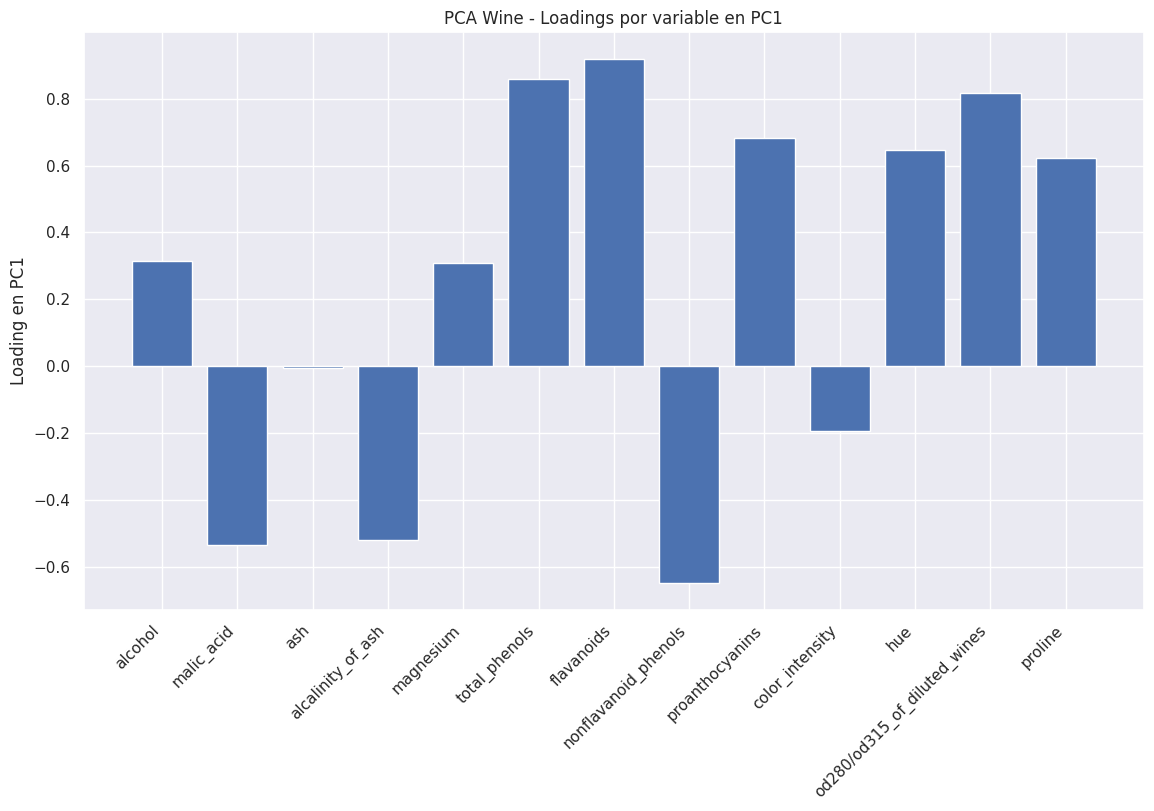

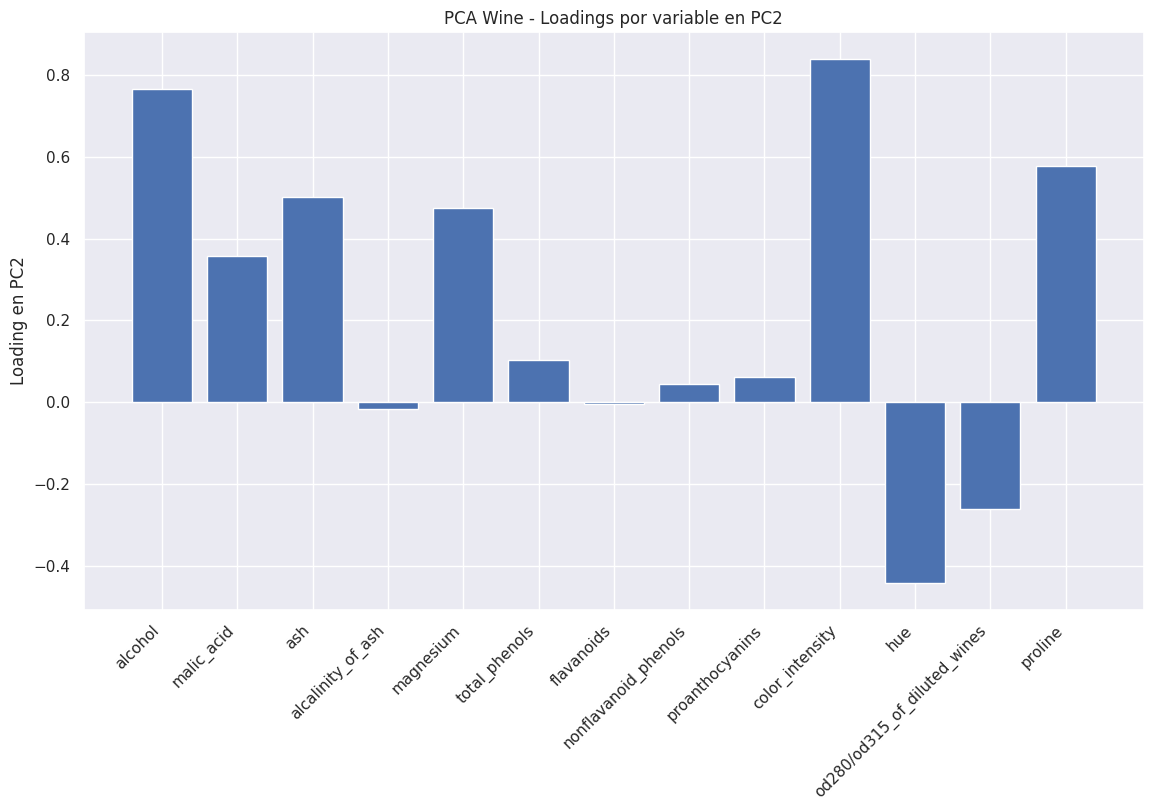

In [38]:
# 5) Graficos de barras de loadings (PC1 y PC2)
plt.figure()
plt.bar(range(len(features)), loadings_df["PC1"].values)
plt.xticks(range(len(features)), features, rotation=45, ha="right")
plt.ylabel("Loading en PC1")
plt.title("PCA Wine - Loadings por variable en PC1")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(range(len(features)), loadings_df["PC2"].values)
plt.xticks(range(len(features)), features, rotation=45, ha="right")
plt.ylabel("Loading en PC2")
plt.title("PCA Wine - Loadings por variable en PC2")
plt.tight_layout()
plt.show()

*   En la primera componente principal (PC1), las características `flavanoids`, `total_phenols` y `od280/od315_of_diluted_wines` tienen mayor influencia, lo cual sugiere un eje de "contenido o actividad fenólica".
*   La segunda componente principal (PC2) está dominada por `color_intensity`, `alcohol` y `proline`. Por ende, este es un eje asociado al color o gradiente cromático y concentración alcohólica.
*   En la tercera componente principal (PC3) resaltan `ash` y `alcalinity_of_ash`, separando las características por cenizas/alcalinidad.


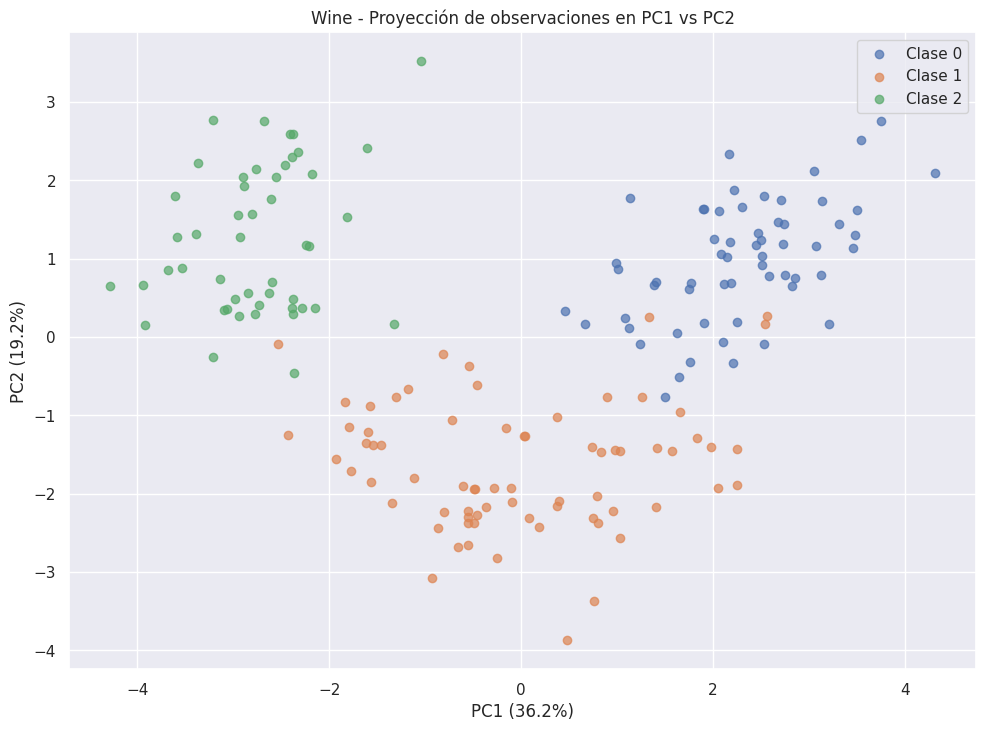

In [39]:
# Visualización en 2D
# Gráfico PC1 vs PC2
plt.figure()
for c in sorted(scores_df["wine_class"].unique()):
    sub = scores_df[scores_df["wine_class"] == c]
    plt.scatter(sub["PC1"], sub["PC2"], label=f"Clase {c}", alpha=0.7)
evr = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({evr[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({evr[1]*100:.1f}%)")
plt.title("Wine - Proyección de observaciones en PC1 vs PC2")
plt.legend()
plt.grid(True)
plt.show()

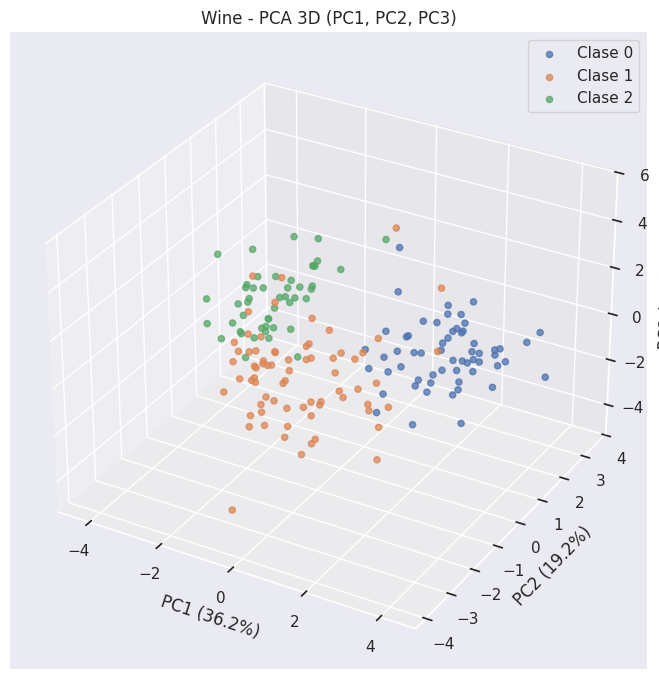

In [40]:
# Visualizacion en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for c in sorted(scores_df["wine_class"].unique()):
    sub = scores_df[scores_df["wine_class"] == c]
    ax.scatter(sub["PC1"], sub["PC2"], sub["PC3"], label=f"Clase {c}", alpha=0.75)
evr = pca.explained_variance_ratio_
ax.set_xlabel(f"PC1 ({evr[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({evr[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({evr[2]*100:.1f}%)")
ax.set_title("Wine - PCA 3D (PC1, PC2, PC3)")
ax.legend()
plt.show()

En el espacio proyectado a 2D, las tres variedades de vino se separan de forma clara, aunque con algunos solapamientos.

En el espacio proyectado a 3D, las variedades siguen siendo claramente separadas y los solapamientos parecen disminuir, aunque no son fácilmente apreciables debido a la perspectiva del gráfico.



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



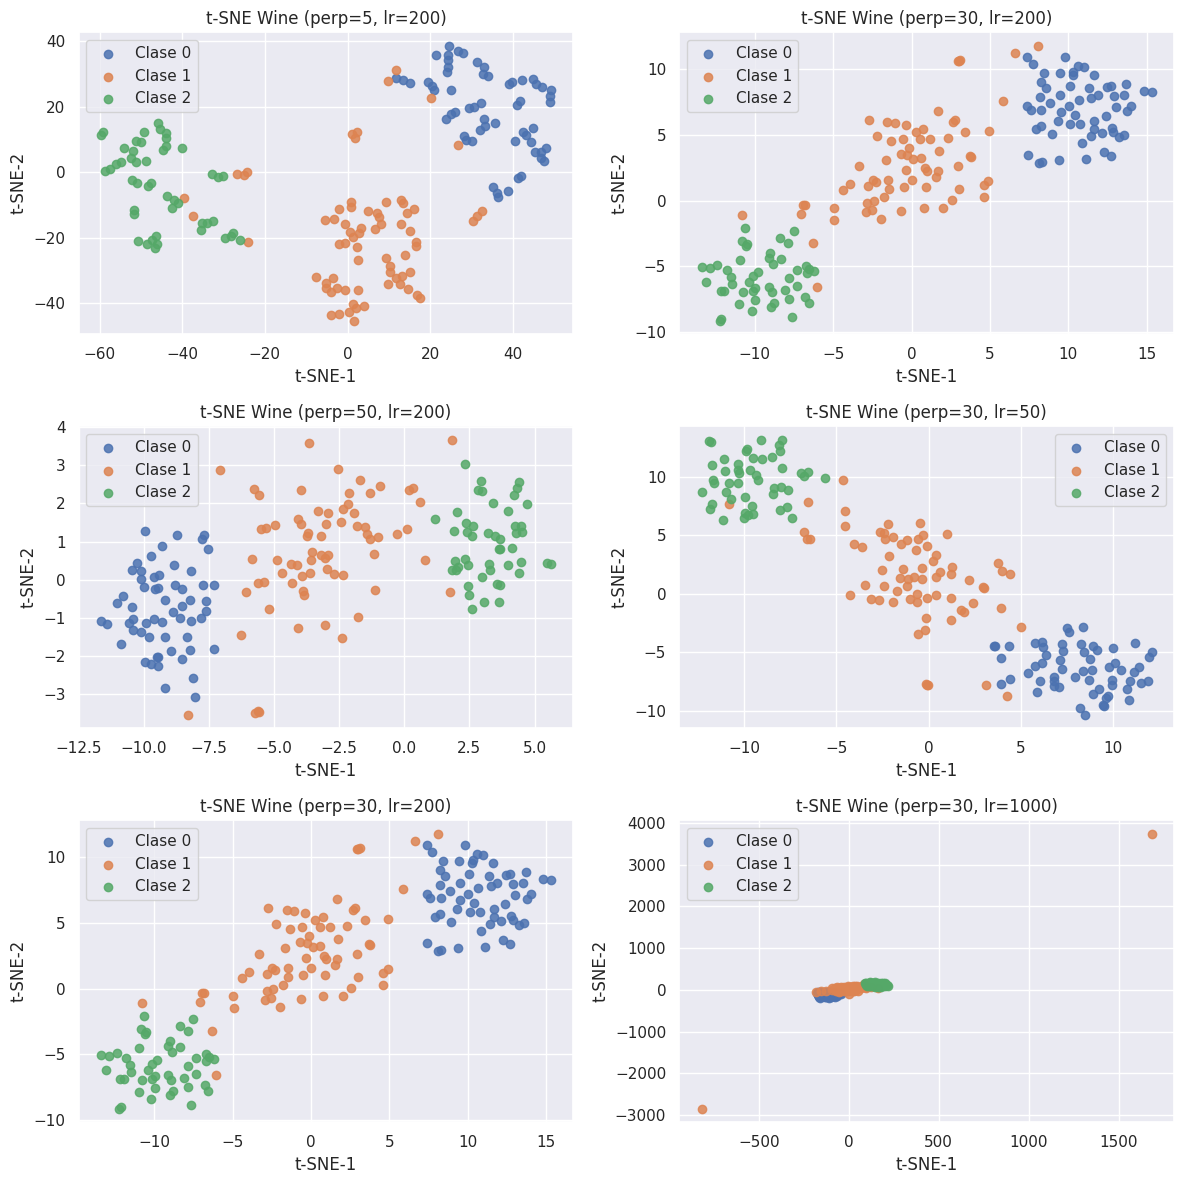

In [41]:
# Estandarizar los datos
features = wine.drop(columns=target).columns.tolist()
target = "wine_class"

X = wine[features].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y = wine[target].values
# Probaremos los siguientes hiperparametros
configs = [
    # Perplexity (lr fijo)
    {"perplexity": 5,  "learning_rate": 200},
    {"perplexity": 30, "learning_rate": 200},
    {"perplexity": 50, "learning_rate": 200},
    # Learning rate (perp fijo)
    {"perplexity": 30, "learning_rate": 50},
    {"perplexity": 30, "learning_rate": 200},
    {"perplexity": 30, "learning_rate": 1000},
]
# Configuración para la visualización
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()
i=0
# Grafico para cada configuracion
for cfg in configs:
    tsne = TSNE(n_components=2,
                perplexity=cfg["perplexity"],
                learning_rate=cfg["learning_rate"],
                random_state=42)
    Z = tsne.fit_transform(X_std)
    for c in np.unique(y):
        pts = Z[y == c]
        axes[i].scatter(pts[:,0], pts[:,1], label=f"Clase {c}", alpha=0.85)
    axes[i].set_title(f"t-SNE Wine (perp={cfg['perplexity']}, lr={cfg['learning_rate']})")
    i+=1
# Ajustes finales para la visualización
for ax in axes:
    ax.set_xlabel("t-SNE-1")
    ax.set_ylabel("t-SNE-2")
    ax.legend()
    ax.grid(True)
plt.tight_layout()
plt.show()

Para `perp=5`, `lr=200`, se resalta la estructura local de los datos. Por ejemplo, la clase 1 parece dividirse en subgrupos y hay grandes distancias entre los clústeres.

Para `perp=50`, `lr=200`, destaca las relaciones globales, con 3 clústeres muy definidos y casi en una banda (en orden 0, 1, 2 en 1D). Se pierde cierta geometría local.

Para `perp=30`, `lr=200`, hay un balance micro/macro. Se ven 3 clústeres nítidos, con una configuración diagonal en lugar de la forma de banda.

Para `perp=30`, `lr=1000`, se pierde toda la geometría y relación local. Los datos se concentran como una pequeña nube alargada, sin separación clara de las clases debido a 2 outliers en una escala muy alta.

A la postre, el hiperparámetro "perplexity" se encarga de priorizar la estructura local (valor bajo) o global (valor alto), mientras que "learning rate" controla el tamaño de los pasos en el proceso de optimización lo cual, para valores altos, puede generar inestabilidad por outliers y escalas enormes.

En conclusión, usando t-SNE, las tres clases de vinos forman agrupaciones definidas. Asimismo, t-SNE sí logra capturar relaciones no lineales que PCA no refleja.

Por ejemplo, en PCA 2D, las clases 0 y 1 (centro y derecha) tienen cierto solapamiento, pero en t-SNE con `perp=30` y `lr=200`, el solapamiento es mucho menor. Esto indica que t-SNE revela relaciones no lineales (y separaciones claras entre las clases) que PCA, con una proyección lineal, no puede desplegar en 2D.



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



La ventaja de PCA está en su interpretabilidad: es posible visualizar cláramente qué variables tienen mayor influencia y cuánta varianza se esta reteniendo con cada componente principal. No obstante, su mayor limitación es su modelo lineal: no logra capturar relaciones no lineales, lo cual puede ocasionar (como se vio en este laboratorio) solapamientos entre los clústeres.

Por otro lado, las ventajas de t-SNE es que preserva relacionea locales, incluso si son no lineales. A pesar de ello, su limitación es que es muy sensible a los hiperparámetros: como se vio en la parte anterior, un valor de `learning_rate=1000` distorsionó toda la geometría y la escala, por lo que, en general, las distancias no son interpretables.

Es recomendable usar PCA cuando se necesita interpretar las dimensiones (loadings), los ejes principales (por ejemplo, "eje fenólico" o "eje de alcalinidad") y medir la varianza explicada. En cambio, es recomendable usar t-SNE en la etapa de exploración de datos, para identificar posibles clústeres (especialmente si poseen estructura no lineal), subgrupos y outliers.

Evidentemente, en 13 dimensiones, es imposible ver clases. Por eso, es muy importante reducir la dimensionalidad. Por ejemplo, gracias a esta estrategia, se pudo visualizar tres grupos en el dataset Wine y sus patrones ocultos y/o locales.

Asimismo, la reducción de dimensiones permite disminuir la complejidad y el ruido, lo que se traduce en menor costo computacional, en especial para aplicar posteriores algoritmos de ML.

Por último, reducir la dimensionalidad posibilita la confección de gráficos de dispersión en 2D o 3D, lo cual facilita tanto la interpretabilidad de resultados (con PCA) como su comunicación y presentación (por ejemplo, con t-SNE se ven clústeres claros).